In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from hub_tools_V2 import *
from astropy.coordinates import SkyCoord
from astropy import units as u

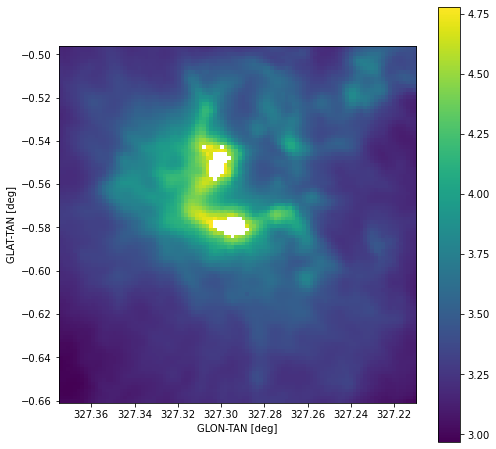

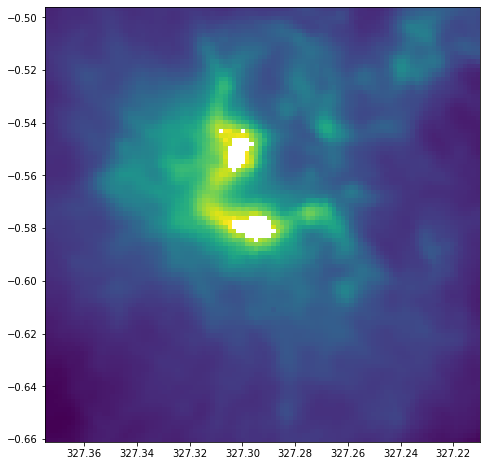

,Seq,Name,RAJ2000,DEJ2000,amaj,amin,PA,FWHM,Sp,Sint,S_N
0,916,G327.2921-0.5792,238.2851,-54.6191,25,22,0,23,49.21,71.17,243.25
1,918,G327.2970-0.5440,238.2530,-54.5888,29,19,144,24,2.35,3.53,19.67
2,919,G327.3005-0.5509,238.2653,-54.5919,38,28,63,33,11.26,32.27,88.00
3,920,G327.3039-0.5775,238.2989,-54.6104,50,22,147,33,7.14,21.32,58.15
4,922,G327.3062-0.5422,238.2633,-54.5816,32,31,14,31,3.51,9.43,33.92
5,923,G327.3087-0.5596,238.2857,-54.5935,24,20,101,22,1.96,2.55,17.33
6,924,G327.3104-0.5503,238.2778,-54.5852,32,19,76,25,0.83,1.39,9.02
7,925,G327.3119-0.5727,238.3044,-54.6016,30,20,100,24,1.20,1.91,12.58


In [2]:
info = 'sat21sources.fits'
file = 'SAT250_21.fits'

image = fits.open(file)[0].data
table = fits.open(info)[1].data
tab_head = fits.open(info)[1].header

grid,data,sat = display_fits(file,return_vals=True)

xl,xr,yb,yt = grid[0][0,0], grid[0][0,-1], grid[1][0,0], grid[1][-1,0]

plt.figure(figsize=(8,8))
plt.imshow(np.log10(data),origin='lower',extent=[xl,xr,yb,yt])
plt.show()

df = pd.DataFrame(table)
df

In [3]:
#using astropy converter

df['l'] = np.empty(8)
df['b'] = np.empty(8)

names = df['Name'].copy()

for i in range(len(names)):
    df.iloc[i,-2] = float(names[i][1:9])
    df.iloc[i,-1] = float(names[i][9:])
df

,Seq,Name,RAJ2000,DEJ2000,amaj,amin,PA,FWHM,Sp,Sint,S_N,l,b
0,916,G327.2921-0.5792,238.2851,-54.6191,25,22,0,23,49.21,71.17,243.25,327.2921,-0.5792
1,918,G327.2970-0.5440,238.2530,-54.5888,29,19,144,24,2.35,3.53,19.67,327.2970,-0.5440
2,919,G327.3005-0.5509,238.2653,-54.5919,38,28,63,33,11.26,32.27,88.00,327.3005,-0.5509
3,920,G327.3039-0.5775,238.2989,-54.6104,50,22,147,33,7.14,21.32,58.15,327.3039,-0.5775
4,922,G327.3062-0.5422,238.2633,-54.5816,32,31,14,31,3.51,9.43,33.92,327.3062,-0.5422
5,923,G327.3087-0.5596,238.2857,-54.5935,24,20,101,22,1.96,2.55,17.33,327.3087,-0.5596
6,924,G327.3104-0.5503,238.2778,-54.5852,32,19,76,25,0.83,1.39,9.02,327.3104,-0.5503
7,925,G327.3119-0.5727,238.3044,-54.6016,30,20,100,24,1.20,1.91,12.58,327.3119,-0.5727


In [4]:
mu_vals = np.array(df.iloc[:,-2:],float)
theta_vals = np.array(df['PA'],float)
FWHM_vals = np.array(df.iloc[:,4:6],float)

[ 3.27292100e+02 -5.79200000e-01  6.58858578e+04  0.00000000e+00
  6.94444444e-03  6.11111111e-03  3.27297000e+02 -5.44000000e-01
  6.58858578e+04  2.51327412e+00  8.05555556e-03  5.27777778e-03
  3.27300500e+02 -5.50900000e-01  6.58858578e+04  1.09955743e+00
  1.05555556e-02  7.77777778e-03  3.27303900e+02 -5.77500000e-01
  6.58858578e+04  2.56563400e+00  1.38888889e-02  6.11111111e-03
  3.27306200e+02 -5.42200000e-01  6.58858578e+04  2.44346095e-01
  8.88888889e-03  8.61111111e-03  3.27308700e+02 -5.59600000e-01
  6.58858578e+04  1.76278254e+00  6.66666667e-03  5.55555556e-03
  3.27310400e+02 -5.50300000e-01  6.58858578e+04  1.32645023e+00
  8.88888889e-03  5.27777778e-03  3.27311900e+02 -5.72700000e-01
  6.58858578e+04  1.74532925e+00  8.33333333e-03  5.55555556e-03]


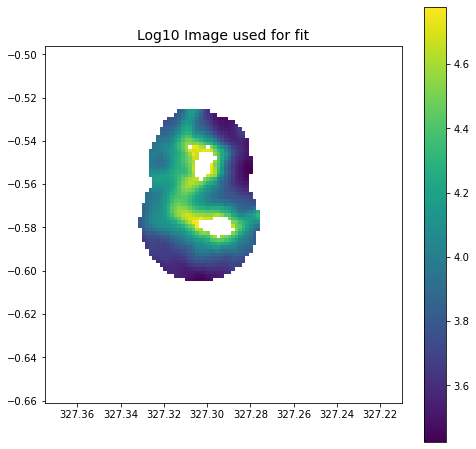

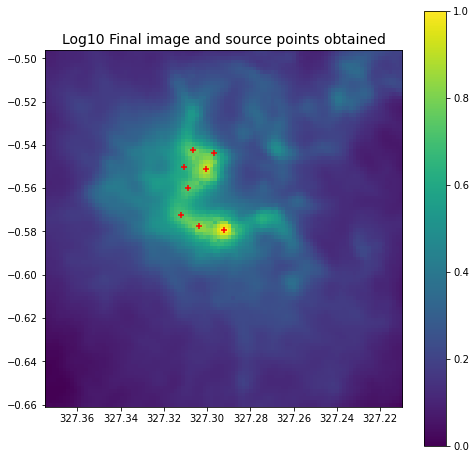

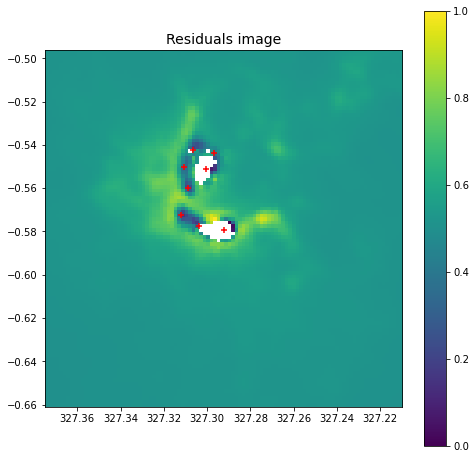

"\nplt.figure(figsize=(10,10))\nplt.imshow(np.log10(data),origin='lower',extent=[xl,xr,yb,yt])\nplt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')\nplt.colorbar()\nplt.show()\n\nplt.figure(figsize=(10,10))\nplt.imshow(np.log10(image),origin='lower',extent=[xl,xr,yb,yt])\nplt.scatter(mu_vals[:,0],mu_vals[:,1],color='black',marker='+')\nplt.scatter(params[::6],params[1::6],color='red',marker='+')\nplt.colorbar()\nplt.show()\n\nplt.figure(figsize=(6,6))\nplt.imshow(gaussians,origin='lower',extent=[xl,xr,yb,yt])\nplt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')\nplt.colorbar()\nplt.show()\n\nplt.figure(figsize=(6,6))\nplt.imshow(residuals,origin='lower',extent=[xl,xr,yb,yt])\nplt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')\nplt.colorbar()\nplt.show()\n"

In [5]:
params,image,residuals = fitter(grid,data,peaks=8,mu=mu_vals,theta=theta_vals,FWHM=FWHM_vals,dist_factor=2,exclude_below=0.1,var_pos=0.0001)

gaussians = gaussianMult(grid,*params)
residuals = data - gaussians



"""
plt.figure(figsize=(10,10))
plt.imshow(np.log10(data),origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(np.log10(image),origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='black',marker='+')
plt.scatter(params[::6],params[1::6],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(gaussians,origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(residuals,origin='lower',extent=[xl,xr,yb,yt])
plt.scatter(mu_vals[:,0],mu_vals[:,1],color='red',marker='+')
plt.colorbar()
plt.show()
"""

# remove the """ """ to view

# Using automated table input:

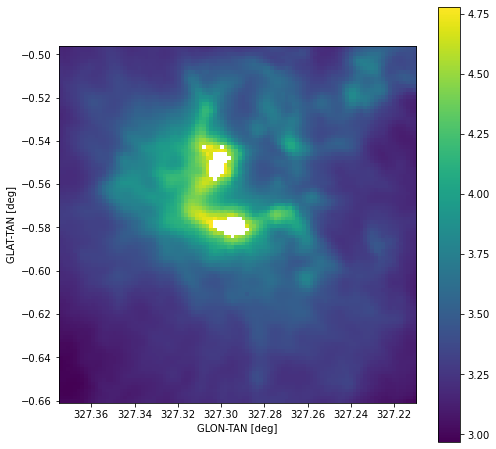

In [6]:
info = 'sat21sources.fits'
file = 'SAT250_21.fits'

image = fits.open(file)[0].data

grid,data,sat = display_fits(file,return_vals=True)



[ 3.27292100e+02 -5.79200000e-01  6.58858578e+04  0.00000000e+00
  6.94444444e-03  6.11111111e-03  3.27297000e+02 -5.44000000e-01
  6.58858578e+04  2.51327412e+00  8.05555556e-03  5.27777778e-03
  3.27300500e+02 -5.50900000e-01  6.58858578e+04  1.09955743e+00
  1.05555556e-02  7.77777778e-03  3.27303900e+02 -5.77500000e-01
  6.58858578e+04  2.56563400e+00  1.38888889e-02  6.11111111e-03
  3.27306200e+02 -5.42200000e-01  6.58858578e+04  2.44346095e-01
  8.88888889e-03  8.61111111e-03  3.27308700e+02 -5.59600000e-01
  6.58858578e+04  1.76278254e+00  6.66666667e-03  5.55555556e-03
  3.27310400e+02 -5.50300000e-01  6.58858578e+04  1.32645023e+00
  8.88888889e-03  5.27777778e-03  3.27311900e+02 -5.72700000e-01
  6.58858578e+04  1.74532925e+00  8.33333333e-03  5.55555556e-03]


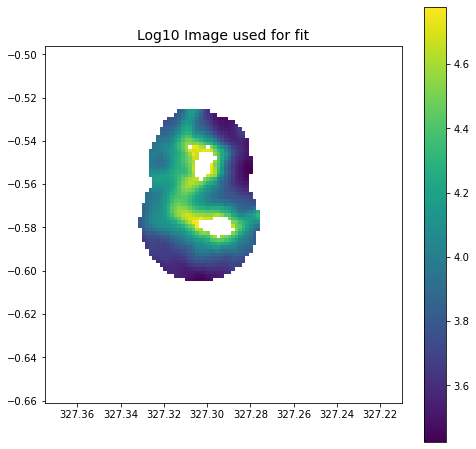

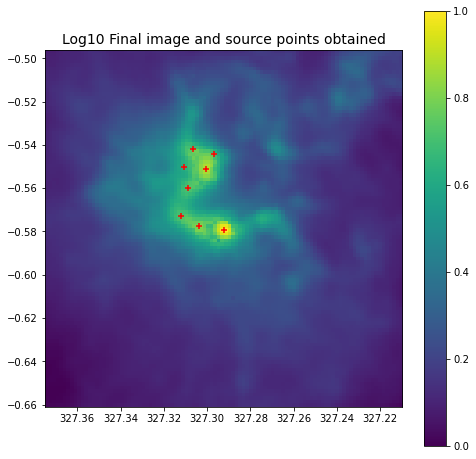

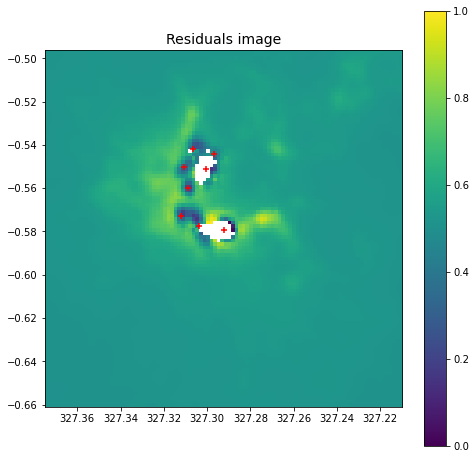

In [7]:
params,image,residuals = fitter(grid,data,input_filename=info,peaks=8,dist_factor=2,exclude_below=0.5,var_pos=0.0001)


[ 3.27292100e+02 -5.79200000e-01  6.58858578e+04  0.00000000e+00
  6.94444444e-03  6.11111111e-03  3.27297000e+02 -5.44000000e-01
  6.58858578e+04  2.51327412e+00  8.05555556e-03  5.27777778e-03
  3.27300500e+02 -5.50900000e-01  6.58858578e+04  1.09955743e+00
  1.05555556e-02  7.77777778e-03  3.27303900e+02 -5.77500000e-01
  6.58858578e+04  2.56563400e+00  1.38888889e-02  6.11111111e-03
  3.27306200e+02 -5.42200000e-01  6.58858578e+04  2.44346095e-01
  8.88888889e-03  8.61111111e-03  3.27308700e+02 -5.59600000e-01
  6.58858578e+04  1.76278254e+00  6.66666667e-03  5.55555556e-03
  3.27310400e+02 -5.50300000e-01  6.58858578e+04  1.32645023e+00
  8.88888889e-03  5.27777778e-03  3.27311900e+02 -5.72700000e-01
  6.58858578e+04  1.74532925e+00  8.33333333e-03  5.55555556e-03]


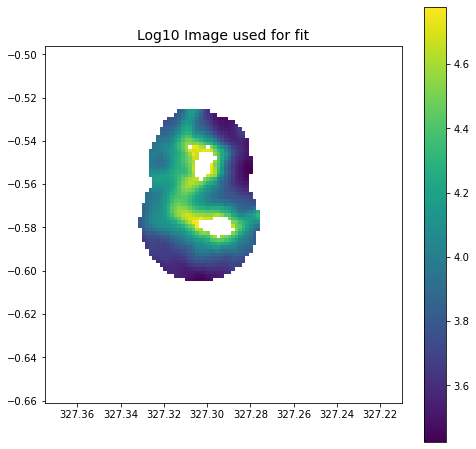

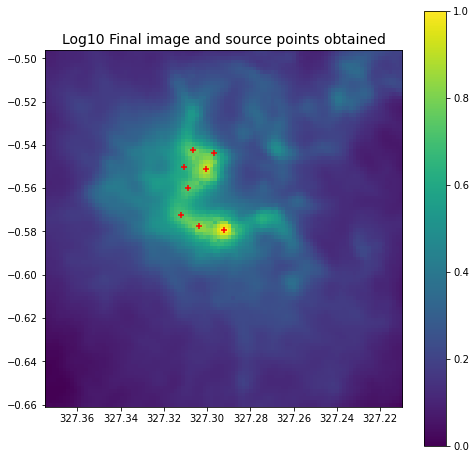

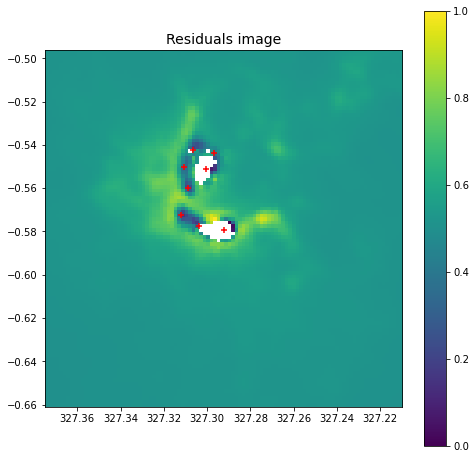

In [8]:
params,image,residuals = fitter(grid,data,peaks=8,mu=mu_vals,theta=theta_vals,FWHM=FWHM_vals,dist_factor=2,exclude_below=0.1,var_pos=0.0001)



In [10]:
header = fits.open(file)[0].header

fits.writeto("V2_test_residuals.fits", residuals, header, overwrite = True)

In [12]:
header["CTYPE1"]

'GLON-TAN'